<a href="https://colab.research.google.com/github/scottspurlock/csc401-2021s/blob/main/tutorials/day07_tutorial_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 7 Tutorial: Text Mining
- Cosine distance
- Preprocessing
- Feature extraction (TF-IDF)
- Finding similar documents


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns;
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


## Cosine Distance
Euclidean or manhattan distance may not be as effective with sparse data (i.e., lots of zeros). Because text feature vectors are generally sparse (most documents contain only a small subset of the possible words), cosine distance is often used.

In [2]:
doc1 = np.array([1, 1, 0, 0, 0, 0, 0])
doc2 = np.array([1, 0, 0, 0, 0, 0, 0])
doc3 = np.array([0, 0, 1, 1, 1, 1, 1])
print(doc1)
print(doc2)
print(doc3)

[1 1 0 0 0 0 0]
[1 0 0 0 0 0 0]
[0 0 1 1 1 1 1]


In [3]:
from scipy.spatial import distance

print('Cosine Distance:')
print(distance.cosine(doc1, doc1))
print(distance.cosine(doc1, doc2))
print(distance.cosine(doc1, doc3))


Cosine Distance:
0.0
0.2928932188134524
1.0


## Data

In [4]:
# Create a corpus (collection of documents) with some simple text data.
data = [
        ["Mr. Green killed Colonel Mustard in the study with the candlestick. Mr. Green is not a very nice fellow."], 
        ["Professor Plum has a green plant in his study."], 
        ["Miss Scarlett watered Professor Plum's green plant while he was away from his office last week."]
       ] 
  
df = pd.DataFrame(data, columns=['doc_text'])

# Force Pandas to show the full column of text
pd.set_option('display.max_colwidth', None)

df

,doc_text
0,Mr. Green killed Colonel Mustard in the study with the candlestick. Mr. Green is not a very nice fellow.
1,Professor Plum has a green plant in his study.
2,Miss Scarlett watered Professor Plum's green plant while he was away from his office last week.


## Pre-processing and feature extraction

### Extract terms and count occurrences

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Specify stop words that should be ignored.
stop_list = ['a', 'an', 'the']

# The next 2 lines accomplish several steps:
# - makes everything lowercase (optional)
# - removes stop words
# - removes punctuation
# - tokenization
# Note that there is no easy way to do stemming without another library, nltk.
count_vect = CountVectorizer(lowercase=True, stop_words=stop_list)
sparse_counts = count_vect.fit_transform(df['doc_text'])

count_vect.get_feature_names()

['away',
 'candlestick',
 'colonel',
 'fellow',
 'from',
 'green',
 'has',
 'he',
 'his',
 'in',
 'is',
 'killed',
 'last',
 'miss',
 'mr',
 'mustard',
 'nice',
 'not',
 'office',
 'plant',
 'plum',
 'professor',
 'scarlett',
 'study',
 'very',
 'was',
 'watered',
 'week',
 'while',
 'with']

In [6]:
sparse_counts

<3x30 sparse matrix of type '<class 'numpy.int64'>'
	with 38 stored elements in Compressed Sparse Row format>

The CountVectorizer returns a sparse matrix, a specialized data structure that is more efficient than a regular matrix for sparse data. We can convert it for ease of use.

In [7]:
counts = sparse_counts.todense()
counts

matrix([[0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0,
         0, 0, 1, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
         1, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
         1, 1, 0, 0, 1, 1, 1, 1, 0]])

In [8]:
feat_idx = 5
feat_name = count_vect.get_feature_names()[feat_idx]
print('Counts for feature:', feat_name)

counts[:, feat_idx]

Counts for feature: green


matrix([[2],
        [1],
        [1]])

### TF-IDF Scores
We generally get better results using TF-IDF scores than using simple counts as features.

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
sparse_tfidf = tfidf_transformer.fit_transform(counts)
tfidf = sparse_tfidf.todense()
tfidf

matrix([[0.        , 0.24579517, 0.24579517, 0.24579517, 0.        ,
         0.29034117, 0.        , 0.        , 0.        , 0.18693356,
         0.24579517, 0.24579517, 0.        , 0.        , 0.49159033,
         0.24579517, 0.24579517, 0.24579517, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.18693356, 0.24579517,
         0.        , 0.        , 0.        , 0.        , 0.24579517],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.26903992, 0.45552418, 0.        , 0.34643788, 0.34643788,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.34643788,
         0.34643788, 0.34643788, 0.        , 0.34643788, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.27054288, 0.        , 0.        , 0.        , 0.27054288,
         0.15978698, 0.        , 0.27054288, 0.20575483, 0.        ,
         0.        , 0.        ,

In [10]:
feat_idx = 5
feat_name = count_vect.get_feature_names()[feat_idx]
print('TFIDF for feature:', feat_name)

tfidf[:, feat_idx]

TFIDF for feature: green


matrix([[0.29034117],
        [0.26903992],
        [0.15978698]])

We can display the TF-IDF feature vectors as a heatmap to get a feel for patterns in the data.

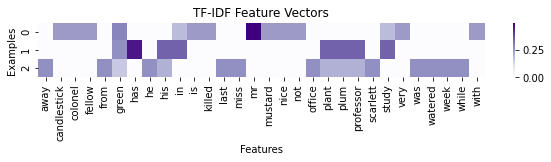

In [11]:
# Display feature vectors as a heatmap
plt.figure(figsize=(10, 1))
sns.heatmap(tfidf, square=False, annot=False, cbar=True, cmap="Purples",
            xticklabels=count_vect.get_feature_names())

plt.xticks(rotation=90) 
plt.xlabel('Features')
plt.ylabel('Examples')
plt.title('TF-IDF Feature Vectors')
plt.show()

## Finding similar documents
We can build a nearest neighbors model (NOT a classifier) to find similar documents among the training examples for a given new example.

In [12]:
# Let's make up a new example. (Note that wrapping the string in square brackets
# makes it a Python list of size 1.)
new_example = ["Miss Scarlett and Colonel Mustard have a son named Mr. Orange. He likes to study in the study."]
new_example

['Miss Scarlett and Colonel Mustard have a son named Mr. Orange. He likes to study in the study.']

In [13]:
# We use our same transformers that have been fit to the data.
# This is important because the tfidf scores in a feature vector need to refer
# to the same terms in order to compare two vectors (documents).
new_counts = count_vect.transform(new_example)
print('New feature counts:\n', new_counts.todense())
new_tfidf = tfidf_transformer.transform(new_counts)
new_tfidf = new_tfidf.todense()
print('\nNew TF-IDF scores:')
new_tfidf

New feature counts:
 [[0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 2 0 0 0 0 0 0]]

New TF-IDF scores:


matrix([[0.        , 0.        , 0.33535157, 0.        , 0.        ,
         0.        , 0.        , 0.33535157, 0.        , 0.25504351,
         0.        , 0.        , 0.        , 0.33535157, 0.33535157,
         0.33535157, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.33535157, 0.51008702, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ]])

In [14]:
# Find the highest valued feature
idx = np.argmax(new_tfidf)
feat = count_vect.get_feature_names()[idx]
print('Highest valued feature: {}, TF-IDF score: {:.2f}'.format(feat, new_tfidf[0, idx]))

Highest valued feature: study, TF-IDF score: 0.51


In [15]:
# Build model to return nearest neighbors
# (Not a classifier)
from sklearn.neighbors import NearestNeighbors

# Create the KNN model
# Since we want to compare sparse feature vectors, we use cosine distance.
knn = NearestNeighbors(n_neighbors=3, algorithm='brute', metric=distance.cosine)

# Fit the model to the TF-IDF feature vectors
model = knn.fit(tfidf)
model

NearestNeighbors(algorithm='brute', leaf_size=30,
                 metric=<function cosine at 0x7f67ffb8e0e0>, metric_params=None,
                 n_jobs=None, n_neighbors=3, p=2, radius=1.0)

In [16]:
distance, neighbor_idx = model.kneighbors(new_tfidf)

print('Distances to neighbors:\n', distance)

print('\nNeighbor index:')
neighbor_idx

Distances to neighbors:
 [[0.52726025 0.72781907 0.7349298 ]]

Neighbor index:


array([[0, 2, 1]])

In [17]:
# Notice that the distances are a list of lists (two sets of square brackets).
# We can iterate through the neighbors like this (using [0] to get rid of the 
# outer set of brackets):
for i in neighbor_idx[0]:
  print(i, df['doc_text'].iloc[i])

0 Mr. Green killed Colonel Mustard in the study with the candlestick. Mr. Green is not a very nice fellow.
2 Miss Scarlett watered Professor Plum's green plant while he was away from his office last week.
1 Professor Plum has a green plant in his study.
